In [410]:
from sklearn import datasets

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn import metrics

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

import seaborn as sns

In [411]:
# df = pd.read_csv("HackerRank-Numeric.csv")
df_value = pd.read_csv("HackRankDataset.csv")

In [412]:
df_value.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


In [413]:
for col in df_value.columns: 
    print (col)

RespondentID
StartDate
EndDate
CountryNumeric2
q1AgeBeginCoding
q2Age
q3Gender
q4Education
q0004_other
q5DegreeFocus
q0005_other
q6LearnCodeUni
q6LearnCodeSelfTaught
q6LearnCodeAccelTrain
q6LearnCodeDontKnowHowToYet
q6LearnCodeOther
q0006_other
q7Level1
q8JobLevel
q0008_other
q8Student
q9CurrentRole
q0009_other
q10Industry
q0010_other
q12JobCritPrefTechStack
q12JobCritCompMission
q12JobCritCompCulture
q12JobCritWorkLifeBal
q12JobCritCompensation
q12JobCritProximity
q12JobCritPerks
q12JobCritSmartPeopleTeam
q12JobCritImpactwithProduct
q12JobCritInterestProblems
q12JobCritFundingandValuation
q12JobCritStability
q12JobCritProfGrowth
q12JobCritOther
q0012_other
q13EmpMeasWhiteboard
q13EmpMeasHackerRank
q13EmpMeasOtherCodingChallenge
q13EmpMeasTechPhoneInt
q13EmpMeasTakeHomeProject
q13EmpMeasResume
q13EmpMeasPastWork
q13EmpMeasOther
q0013_other
q14GoodReflecAbilities
q15Level2
q16HiringManager
q17HirChaInterviews
q17HirChaHardAssessSkills
q17HirChaNotEnoughTalent
q17HirChaNoDiversCandidates

In [448]:
df_value.shape

(25090, 251)

In [453]:
df_value[(df_value['q3Gender']=='Male') | (df_value['q3Gender']=='Female')].shape[0]

24896

In [415]:
# Number of Males in DF
df_value[df_value['q3Gender']=='Male'].shape[0]

20774

In [416]:
df_value[df_value['q3Gender']=='Male']

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
5,6463843138,10/19/17 3:02,10/19/17 3:18,United States,41 - 50 years old,35 - 44 years old,Male,College graduate,NaN,Computer Science,...,Other (please specify),SoloLearn,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
6,6458326054,10/17/17 3:18,10/17/17 3:33,United States,16 - 20 years old,45 - 54 years old,Male,"Post graduate degree (Masters, PhD)",NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,Yes,1.0,2 to 4 hours,NaN,Queue
7,6467198274,10/21/17 8:55,10/21/17 9:06,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Set
8,6477950548,10/26/17 7:03,10/26/17 7:12,Switzerland,16 - 20 years old,18 - 24 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,NaN,Dk,No,NaN,#NULL!,NaN,Queue
9,6477542461,10/26/17 4:23,10/26/17 4:30,Israel,16 - 20 years old,18 - 24 years old,Male,High school graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
10,6482854711,10/28/17 1:57,10/28/17 2:22,Turkey,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
11,6477497195,10/26/17 3:55,10/26/17 4:02,Turkey,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,Yes,4.0,1 -2 hours,NaN,Queue
12,6458360594,10/17/17 3:35,10/17/17 3:59,Lithuania,16 - 20 years old,25 - 34 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue


In [417]:
# Number of Females in DF
df_value[df_value['q3Gender']=='Female'].shape[0]

4122

In [418]:
df_country_age_lang = df_value[['CountryNumeric2','q3Gender', 'q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython', 'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo', 'q25LangSwift', 'q25LangR']]

In [419]:
df_country_age_lang.columns = ['Country', 'Gender', 'C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

In [420]:
df_country_age_lang.head()

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,South Korea,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,Ukraine,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Malaysia,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,Curaçao,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,NaN,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN


In [438]:
is_female = df_country_age_lang['Gender'] == 'Female'
is_male = df_country_age_lang['Gender'] == 'Male'

In [439]:
df_female = df_country_age_lang[is_female]
df_male = df_country_age_lang[is_male]

In [440]:
df_female.head()
df_male.head()

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
1,Ukraine,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Curaçao,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
5,United States,Male,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,United States,Male,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,United States,Male,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN


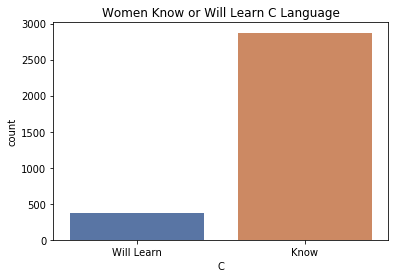

In [441]:
sns.countplot(data=df_female, x="C")
plt.title("Women Know or Will Learn C Language")
plt.show()

In [425]:
df_lang_female = df_female[['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']]
df_lang_male = df_male[['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']]

In [426]:
df_lang_female.head()
df_lang_male.head()

,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
1,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
5,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN


In [427]:
df_langmelt_female = pd.melt(df_lang_female)
df_langmelt_male = pd.melt(df_lang_male)

In [428]:
df_langmelt_female
df_langmelt_female.dropna(subset=['value'], inplace=True)
df_langmelt_female
isKnown = df_langmelt_female['value'] == 'Know'
known = df_langmelt_female[isKnown]
willLearn = df_langmelt_female['value'] == 'Will Learn'
learn = df_langmelt_female[willLearn]

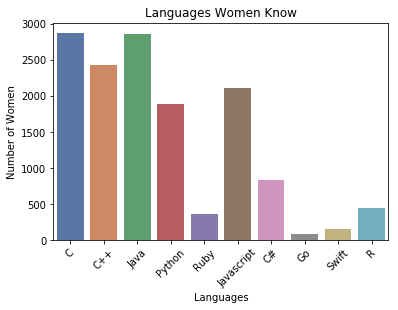

In [429]:
chart1 = sns.countplot(data=known, x="variable")
plt.title("Languages Women Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")
plt.show()

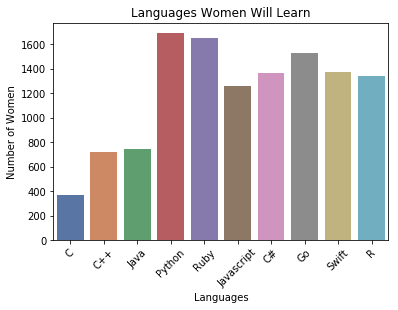

In [430]:
chart2 = sns.countplot(data=learn, x="variable")
plt.title("Languages Women Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
plt.show()

In [431]:
df_langmelt_male
df_langmelt_male.dropna(subset=['value'], inplace=True)
df_langmelt_male
isKnown = df_langmelt_male['value'] == 'Know'
known = df_langmelt_male[isKnown]
willLearn = df_langmelt_male['value'] == 'Will Learn'
learn = df_langmelt_male[willLearn]

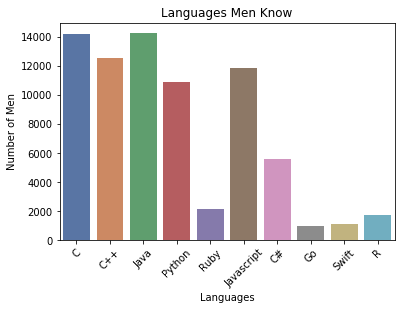

In [432]:
chart1 = sns.countplot(data=known, x="variable")
plt.title("Languages Men Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
plt.show()

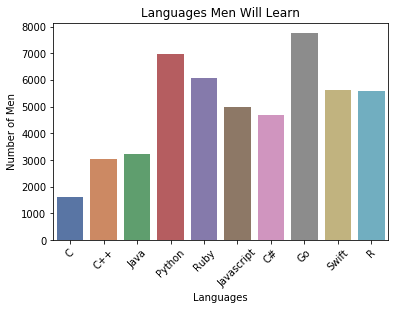

In [433]:
chart2 = sns.countplot(data=learn, x="variable")
plt.title("Languages Men Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
plt.show()

In [434]:
# Pie chart showing percentage of Men and Women who know which language
# subplots showing percentage of men and women starting with C
# C C++ Java Python Ruby
# Javascript C# Go Swift R

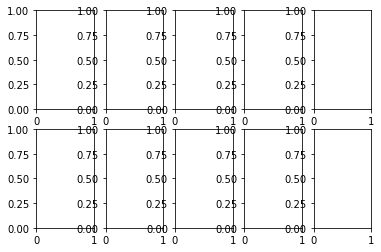

In [436]:
#First Plot
plt.subplot(2, 5, 1)
# plt.pie()

plt.subplot(2, 5, 2)
plt.subplot(2, 5, 3)
plt.subplot(2, 5, 4)
plt.subplot(2, 5, 5)
plt.subplot(2, 5, 6)
plt.subplot(2, 5, 7)
plt.subplot(2, 5, 8)
plt.subplot(2, 5, 9)
plt.subplot(2, 5, 10)